In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick  


In [101]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'axes.facecolor': '#F5F6FA',
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.5,
    'axes.axisbelow': True
})

In [2]:
df = pd.read_csv("Salary_Dataset_DSL.csv")

In [3]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  str    
 2   Job Title          22770 non-null  str    
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  str    
 6   Employment Status  22770 non-null  str    
 7   Job Roles          22770 non-null  str    
dtypes: float64(1), int64(2), str(5)
memory usage: 1.4 MB


In [8]:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [12]:
df[df["Company Name"].isnull()]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
13760,4.0,NaN,Software Development Engineer,1188000,1,Bangalore,Full Time,SDE


In [14]:
df=df.dropna()

In [18]:
df=df.drop_duplicates()

In [19]:
df.info()

<class 'pandas.DataFrame'>
Index: 22769 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22769 non-null  float64
 1   Company Name       22769 non-null  str    
 2   Job Title          22769 non-null  str    
 3   Salary             22769 non-null  int64  
 4   Salaries Reported  22769 non-null  int64  
 5   Location           22769 non-null  str    
 6   Employment Status  22769 non-null  str    
 7   Job Roles          22769 non-null  str    
dtypes: float64(1), int64(2), str(5)
memory usage: 1.6 MB


In [20]:
df.describe()

,Rating,Salary,Salaries Reported
count,22769.000000,2.276900e+04,22769.000000
mean,3.918209,6.953656e+05,1.855813
std,0.519686,8.844124e+05,6.823816
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


outliers check

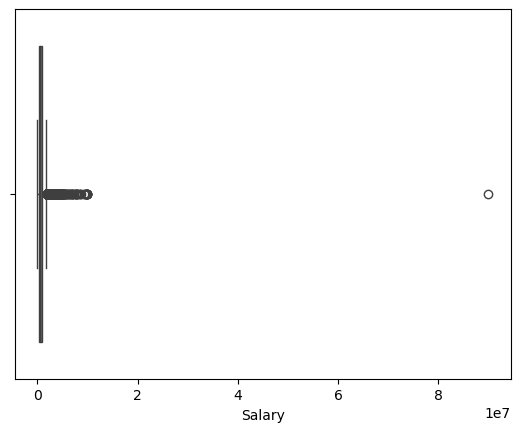

In [22]:
sns.boxplot(data=df,x="Salary")
plt.show()

In [23]:
df.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
14529,4.1,First Student,Software Development Engineer - Intern,588000,2,Hyderabad,Intern,SDE


In [24]:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q1+1.5*iqr

df_normal = df[(df['Salary']<=upper)&(df['Salary']>=lower)].copy()

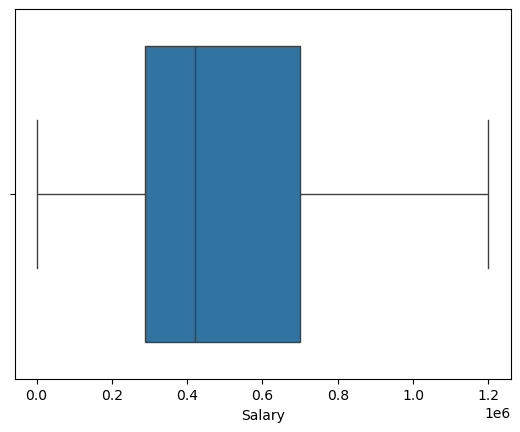

In [25]:
sns.boxplot(data=df_normal,x="Salary")
plt.show()

Univariate Analysis

salary distribution

In [26]:
df['Salary'].describe()

count    2.276900e+04
mean     6.953656e+05
std      8.844124e+05
min      2.112000e+03
25%      3.000000e+05
50%      5.000000e+05
75%      9.000000e+05
max      9.000000e+07
Name: Salary, dtype: float64

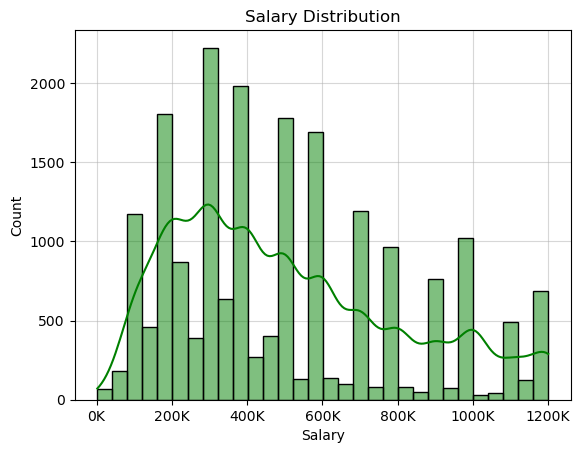

In [41]:
sns.histplot(data=df_normal['Salary'],bins=30,kde=True,color='g')
ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Salary Distribution")
plt.show()

In [49]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
15387,4.0,Frontline Infotech solution,Software Development Engineer In Test (SDET),300000,1,Hyderabad,Full Time,SDE


In [50]:
df_normal['Job Roles'].nunique()

11

In [64]:
df_role_dist = df_normal['Job Roles'].value_counts().sort_values(ascending=False).reset_index(name='count')
df_role_dist

,Job Roles,count
0,SDE,6636
1,Android,2710
2,Frontend,1960
3,Java,1730
4,Testing,1691
5,IOS,1448
6,Backend,991
7,Web,975
8,Python,907
9,Database,660


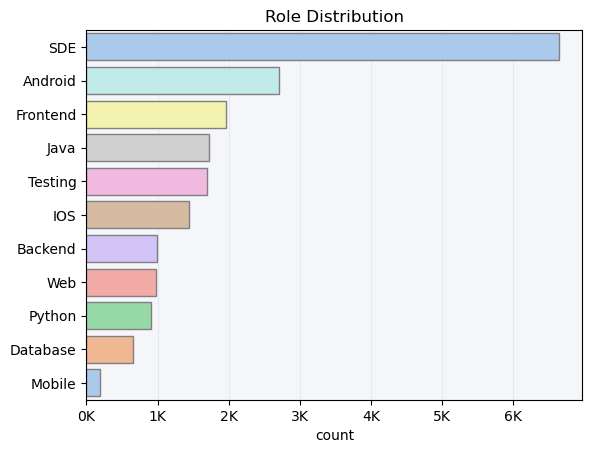

In [105]:
sns.barplot(data=df_role_dist,x='count',y="Job Roles",hue="count",palette='pastel',legend=False,edgecolor='gray', linewidth=1)
ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Role Distribution")
plt.ylabel("")
plt.show()

Business Questions

Highest Average Salary Job Role

In [107]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
5447,3.9,MineWhat,Front End Developer,600000,1,Bangalore,Full Time,Frontend


In [112]:
df_top_salary_role = df.groupby('Job Roles')['Salary'].mean().sort_values(ascending=False).reset_index(name="Avg salary").head(10)
df_top_salary_role

,Job Roles,Avg salary
0,Database,958584.046243
1,Mobile,882282.971429
2,SDE,853753.675874
3,Backend,748518.164154
4,IOS,695254.248927
5,Frontend,610098.699954
6,Android,565911.003056
7,Java,564709.907427
8,Testing,496298.188506
9,Python,486022.791975


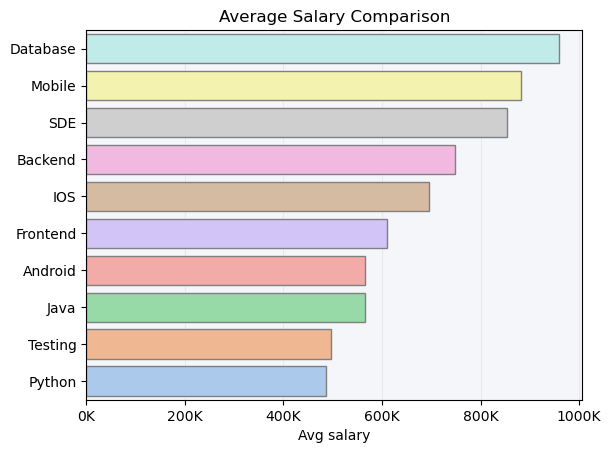

In [117]:
sns.barplot(data=df_top_salary_role,x='Avg salary',y="Job Roles",hue="Avg salary",palette='pastel',legend=False,edgecolor='gray', linewidth=1)
ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Average Salary Comparison")
plt.ylabel("")
plt.show()

Cities with highest average salary

In [120]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16763,3.9,Self,Software Development Engineer (SDE),1000000,1,Mumbai,Full Time,SDE


In [121]:
df_normal["Location"].nunique()

10

In [123]:
df_top_salary_location = df_normal.groupby('Location')['Salary'].mean().sort_values(ascending=False).reset_index(name="Avg salary")
df_top_salary_location

,Location,Avg salary
0,Mumbai,617071.436620
1,Jaipur,523783.783784
2,Bangalore,515279.676445
3,Pune,514223.327302
4,Kerala,507489.219048
5,New Delhi,501713.966552
6,Hyderabad,496108.061038
7,Madhya Pradesh,479548.248276
8,Kolkata,476526.315789
9,Chennai,470844.999558


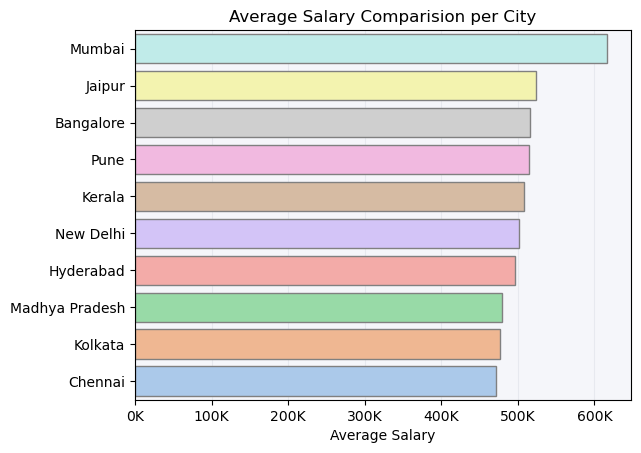

In [125]:
# Barplot with pastel palette and 1px edge
sns.barplot(
    data=df_top_salary_location,
    x='Avg salary',
    y='Location',
    hue='Avg salary',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Average Salary Comparision per City')
plt.xlabel('Average Salary')
plt.ylabel('')
plt.show()

Name 5 companies in New Delhi with rating 5, offering highest and lowest salary.

In [126]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
2306,4.0,Retailogy Solutions,Android Developer,500000,1,New Delhi,Full Time,Android


In [129]:
df_delhi_rating5 = df_normal[(df_normal['Location']=="New Delhi") & (df_normal['Rating']==5)].sort_values(by="Salary",ascending=False)
df_delhi_rating5

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
6755,5.0,Glan Management Consultancy,Front End Developer,1200000,1,New Delhi,Full Time,Frontend
3918,5.0,Easy Eat,Backend Developer,1200000,1,New Delhi,Full Time,Backend
6630,5.0,TAAZAA,Front End Developer,1200000,1,New Delhi,Full Time,Frontend
18376,5.0,Shahbaz514,Software Development Engineer (SDE),1140000,1,New Delhi,Full Time,SDE
18457,5.0,Minder,Software Development Engineer (SDE),1000000,1,New Delhi,Full Time,SDE
...,...,...,...,...,...,...,...,...
8008,5.0,Rabbler,IOS Developer Contractor,100000,1,New Delhi,Contractor,IOS
1969,5.0,WorkingNation,Android Developer - Intern,84000,1,New Delhi,Intern,Android
2334,5.0,Hopin (India),Android Developer - Intern,60000,1,New Delhi,Intern,Android
17524,5.0,Star Catalysts,Software Development Engineer - Intern,60000,1,New Delhi,Intern,SDE


In [132]:
# Top 5 company 
df_delhi_rating5['Company Name'].head(5)

6755     Glan Management Consultancy
3918                        Easy Eat
6630                          TAAZAA
18376                     Shahbaz514
18457                         Minder
Name: Company Name, dtype: str

In [133]:
# Bottom 5 company
df_delhi_rating5['Company Name'].tail(5)

8008            Rabbler
1969      WorkingNation
2334      Hopin (India)
17524    Star Catalysts
18680            Atom 8
Name: Company Name, dtype: str

Job title with highest number of reports

In [138]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1358,3.6,Corpus Inc,Android Developer - Contractor,200000,1,Hyderabad,Contractor,Android


In [139]:
df_normal[df_normal['Salaries Reported']==df_normal['Salaries Reported'].max()]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
19813,3.3,Infosys,Test Engineer,1104000,361,Hyderabad,Full Time,Testing


In [140]:
top_jobs = df.groupby('Job Title')['Salaries Reported'].count().sort_values(ascending=False)
print(top_jobs.head(1))

Job Title
Software Development Engineer    2350
Name: Salaries Reported, dtype: int64


Top 10 company with highest average salary, with at least 20 employees salary reporting.

In [142]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
8640,3.8,Wipro,Software Engineer (Ios Developer),600000,1,Pune,Full Time,IOS


In [144]:
df_20_reported = df_normal[df_normal['Salaries Reported']>=20]
df_20_reported

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
8790,3.9,Tata Consultancy Services,Java Developer,200000,30,Chennai,Full Time,Java
8977,3.8,Cognizant Technology Solutions,Senior Java Developer,200000,35,Chennai,Full Time,Java
8978,3.9,Tata Consultancy Services,Senior Java Developer,300000,30,Chennai,Full Time,Java
8979,3.9,Tata Consultancy Services,Junior Java Developer,200000,30,Chennai,Full Time,Java
9688,3.9,Tata Consultancy Services,Java Developer,200000,43,Hyderabad,Full Time,Java
...,...,...,...,...,...,...,...,...
21762,3.8,CGI,Senior Test Engineer,400000,21,Bangalore,Full Time,Testing
21763,4.1,IBM,Test Automation Engineer,400000,21,Bangalore,Full Time,Testing
21764,3.7,SLK Group,Software Test Engineer,300000,20,Bangalore,Full Time,SDE
21765,4.3,Cisco Systems,Software Test Engineer,700000,20,Bangalore,Full Time,SDE


In [153]:
df_20_salary = df_20_reported.groupby("Company Name")['Salary'].mean().sort_values(ascending=False).reset_index(name="Avg salary").head(10)
df_20_salary 

,Company Name,Avg salary
0,Amadeus,1.200000e+06
1,Nokia,1.200000e+06
2,Expedia Group,1.200000e+06
3,Alcatel-Lucent,1.000000e+06
4,Ola,1.000000e+06
5,Kony,9.000000e+05
6,Lumen,9.000000e+05
7,Cisco Systems,7.000000e+05
8,Microsoft,6.986667e+05
9,McAfee,6.500000e+05


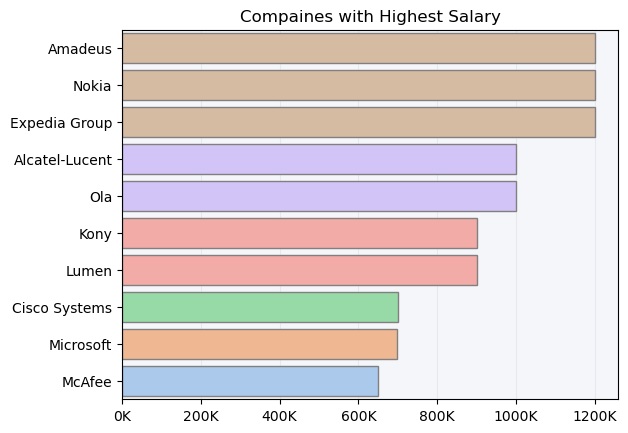

In [209]:
# Barplot with pastel palette and 1px edge
sns.barplot(
    data=df_20_salary,
    x='Avg salary',
    y='Company Name',
    hue='Avg salary',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Compaines with Highest Salary')
plt.xlabel('')
plt.ylabel('')
plt.show()

Relationship between Salary and Rating

In [157]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
10227,3.9,Conceptwave Software Inc,Senior Java Developer,100000,1,Hyderabad,Full Time,Java


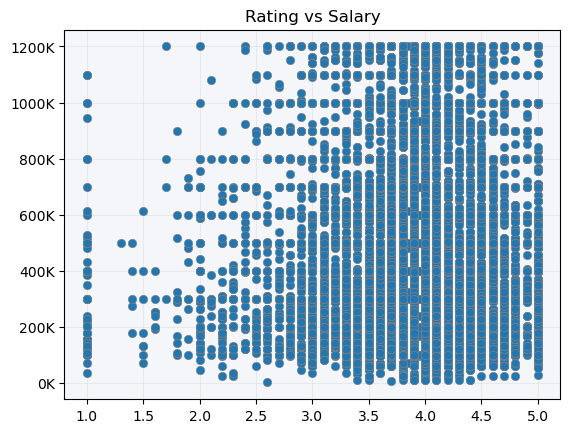

In [168]:

sns.scatterplot(
    data=df_normal,
    x='Rating',
    y='Salary',
    legend=False,
    edgecolor='gray'
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Rating vs Salary')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [160]:
df_normal.select_dtypes('number').corr()

,Rating,Salary,Salaries Reported
Rating,1.000000,0.017566,-0.014178
Salary,0.017566,1.000000,-0.021567
Salaries Reported,-0.014178,-0.021567,1.000000


Does employment status affect salary?

In [169]:
df_normal.sample()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
4568,3.3,Sol Analytics,Database Administrator (Database Administrator),800000,1,Bangalore,Full Time,Database


In [173]:
df_normal.groupby("Employment Status")['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Contractor,495.0,468732.218182,269053.175462,12000.0,294000.0,400000.0,600000.0,1200000.0
Full Time,17301.0,528444.423791,302771.101441,8448.0,300000.0,500000.0,700000.0,1200000.0
Intern,2076.0,331850.427746,251771.285527,2112.0,144000.0,264000.0,456000.0,1200000.0
Trainee,33.0,324303.030303,241096.516572,96000.0,144000.0,240000.0,400000.0,1100000.0


In [171]:
df_status_salary = df_normal.groupby("Employment Status")['Salary'].mean().sort_values(ascending=False).reset_index(name="Avg salary")
df_status_salary

,Employment Status,Avg salary
0,Full Time,528444.423791
1,Contractor,468732.218182
2,Intern,331850.427746
3,Trainee,324303.030303


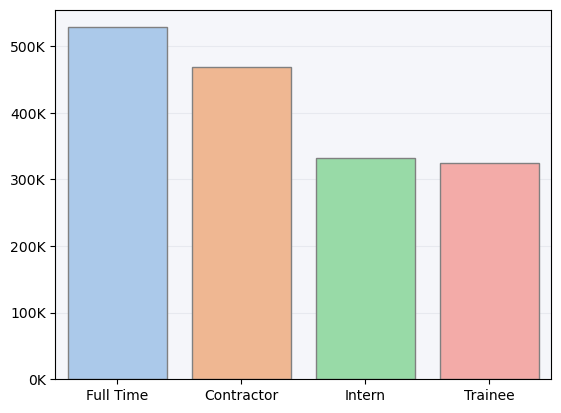

In [ ]:
# Plot with pastel palette and 1px edge
sns.barplot(
    data=df_status_salary,
    x='Employment Status',
    y='Avg salary',
    hue='Employment Status',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Average Salary Comparison')
plt.xlabel('')
plt.ylabel('')
plt.show()

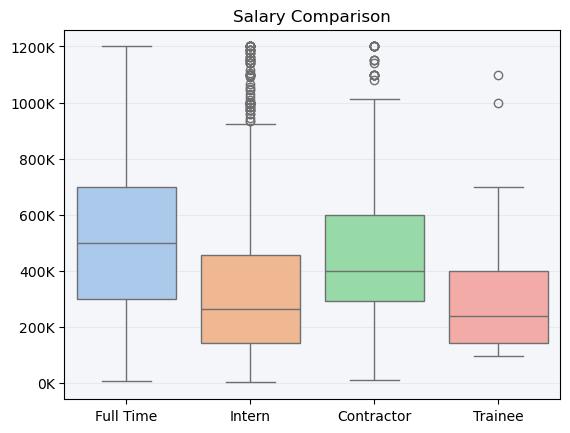

In [177]:
# Plot with pastel palette and 1px edge
sns.boxplot(
    data=df_normal,
    x='Employment Status',
    y='Salary',
    hue='Employment Status',
    palette='pastel',
    legend=False
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Salary Comparison')
plt.xlabel('')
plt.ylabel('')
plt.show()

Most common Job roles

already shown above in job distribution

How does average salary change as company rating increases

In [185]:
df_rating_salary = df_normal.groupby("Rating")['Salary'].mean().reset_index(name="Avg salary")
df_rating_salary

,Rating,Avg salary
0,1.00,382510.730159
1,1.30,500000.000000
2,1.40,331200.000000
3,1.50,241000.000000
4,1.60,262285.714286
5,1.70,750000.000000
6,1.80,330333.333333
7,1.90,438666.666667
8,2.00,402384.615385
9,2.10,392000.000000


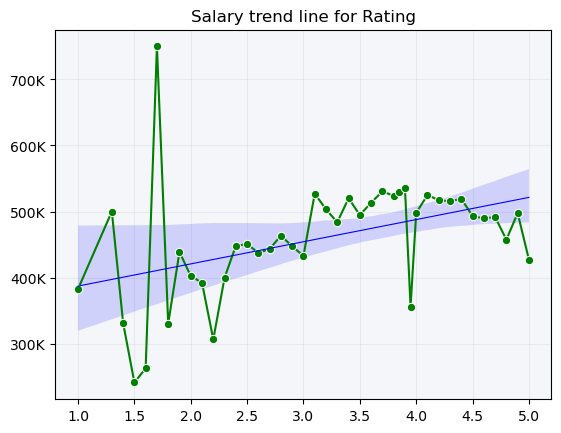

In [208]:
sns.lineplot(
    data=df_rating_salary,
    x='Rating',
    y='Avg salary',
    color='g',
    marker='o'
)
sns.regplot(
    data=df_rating_salary,
    x='Rating',
    y='Avg salary',
    color='b',
    scatter=False,
    line_kws={'linewidth': 0.8}
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Salary trend line for Rating')
plt.xlabel('')
plt.ylabel('')
plt.show()

Dashboard

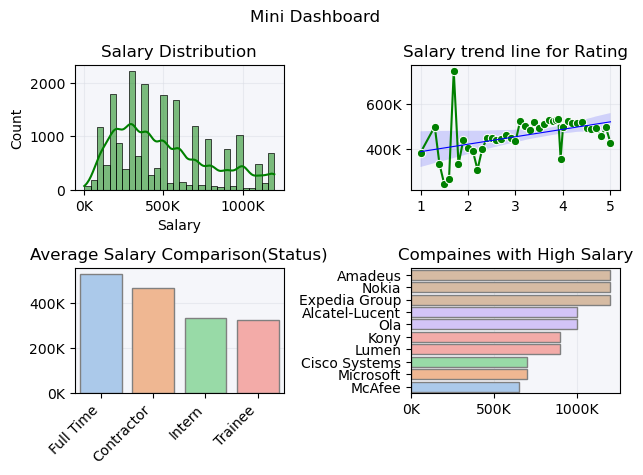

In [215]:
plt.subplot(2,2,1)
sns.histplot(data=df_normal['Salary'],bins=30,kde=True,color='g')
ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Salary Distribution")

plt.subplot(2,2,2)
sns.lineplot(
    data=df_rating_salary,
    x='Rating',
    y='Avg salary',
    color='g',
    marker='o'
)
sns.regplot(
    data=df_rating_salary,
    x='Rating',
    y='Avg salary',
    color='b',
    scatter=False,
    line_kws={'linewidth': 0.8}
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Salary trend line for Rating')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
sns.barplot(
    data=df_status_salary,
    x='Employment Status',
    y='Avg salary',
    hue='Employment Status',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)
plt.xticks(rotation=45,ha='right')
plt.title('Average Salary Comparison(Status)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,4)
sns.barplot(
    data=df_20_salary,
    x='Avg salary',
    y='Company Name',
    hue='Avg salary',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Compaines with High Salary')
plt.xlabel('')
plt.ylabel('')

plt.suptitle("Mini Dashboard")
plt.tight_layout()
plt.show()